# Exploring Fancy Indexing

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [5]:
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [14]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [21]:
X[row[:, np.newaxis], col]
# array([[0],
#       [1],
#       [2]])
# array([2, 1, 3])
# [[0]][2, 1, 3]
# [[1]][2, 1, 3]
# [[2]][2, 1, 3]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [9]:
row[:, np.newaxis] * col
# array([[0],
#       [1],
#       [2]])
# array([[2, 1, 3],
#       [2, 1, 3],
#       [2, 1, 3]])
# ->
# array([[0, 0, 0],
#       [1, 1, 1],
#       [2, 2, 2]])
# array([[2, 1, 3]],
#      [2, 1, 3],
#      [2, 1, 3])

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined Indexing

In [16]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [18]:
X[1: , [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [19]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

In [22]:
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

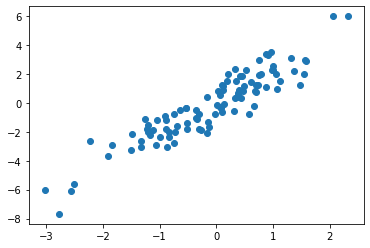

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1]);

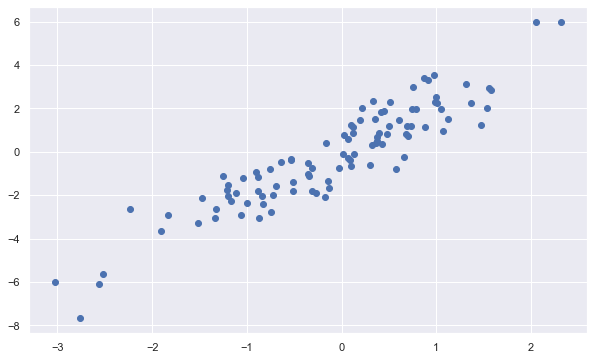

In [25]:
import seaborn; seaborn.set()

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])

In [40]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([97, 49, 34, 84, 35, 45, 39, 64, 21, 17, 37, 54, 96, 31, 62, 63, 68,
       56, 44, 52])

In [41]:
selection = X[indices]
selection.shape

(20, 2)

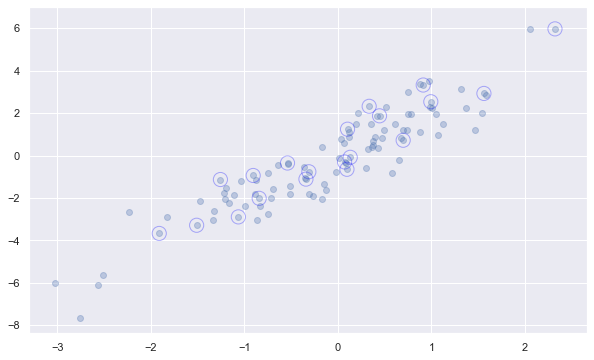

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolors='none', edgecolors='blue', s=200, alpha=0.3)

# Modifying Values with Fancy Indexing

In [53]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [54]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [56]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x
# The result of this operation is to first assign x[0] = 4, followed by x[0] = 6

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [58]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

# Example: Binning Data

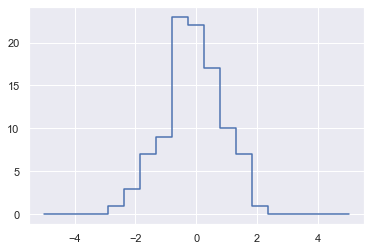

In [64]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

plt.plot(bins, counts, drawstyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

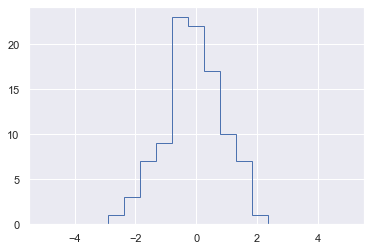

In [65]:
plt.hist(x, bins, histtype='step')

In [67]:
print('Numpy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('Custom routine:')
%timeit np.add.at(np.zeros_like(bins), np.searchsorted(bins, x), 1)

Numpy routine:
27 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
20.9 µs ± 653 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
# NumPy's algorithm is more flexible, and particularly is designed 
# for better performance when the number of data points becomes large

x = np.random.randn(1_000_000)
print('Numpy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('Costom routine')
%timeit np.add.at(np.zeros_like(bins), np.searchsorted(bins, x), 1)

Numpy routine:
69.8 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Costom routine
129 ms ± 938 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
